In [1]:
# 1. Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2. Load the dataset
df = pd.read_csv("Stores_data.csv")

print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905  

In [3]:
# 3. Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract day and month
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()

# Convert 'Time' to datetime format and extract hour
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

In [4]:
# 4. Shape and basic info
print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())


Dataset Shape: (1000, 19)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   int32        

In [5]:
# 5. Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())




Missing values in the dataset:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
dtype: int64


In [6]:
# 6. Descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
        Unit price     Quantity       Tax 5%        Total  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.379369   322.966749   
min      10.080000     1.000000     0.508500    10.678500   
25%      32.875000     3.000000     5.924875   124.422375   
50%      55.230000     5.000000    12.088000   253.848000   
75%      77.935000     8.000000    22.445250   471.350250   
max      99.960000    10.000000    49.650000  1042.650000   
std      26.494628     2.923431    11.708825   245.885335   

                             Date         Time        cogs  \
count                        1000  1000.000000  1000.00000   
mean   2019-02-14 00:05:45.600000    14.910000   307.58738   
min           2019-01-01 00:00:00    10.000000    10.17000   
25%           2019-01-24 00:00:00    12.000000   118.49750   
50%           2019-02-13 00:00:00    15.000000   241.76000   
75%           2019-03-08 00:00:00    18.000000   448.

In [7]:
# 7. Unique values in categorical columns
print("\nUnique values in 'Branch', 'City', 'Customer type', 'Gender', 'Payment':")
for col in ['Branch', 'City', 'Customer type', 'Gender', 'Payment']:
    print(f"{col}: {df[col].unique()}")


Unique values in 'Branch', 'City', 'Customer type', 'Gender', 'Payment':
Branch: ['A' 'C' 'B']
City: ['Yangon' 'Naypyitaw' 'Mandalay']
Customer type: ['Member' 'Normal']
Gender: ['Female' 'Male']
Payment: ['Ewallet' 'Cash' 'Credit card']



Total Sales by Branch:
Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


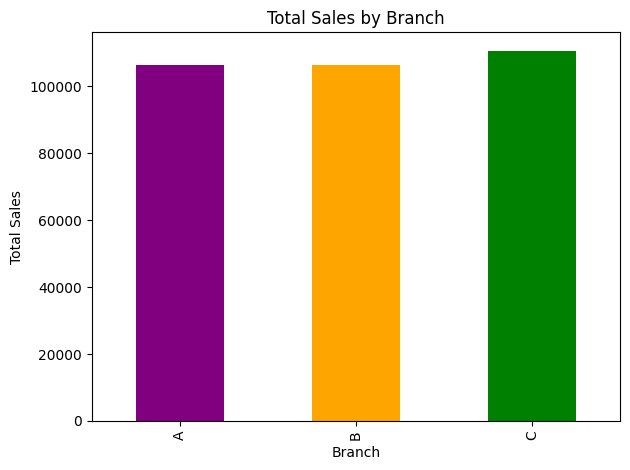

In [8]:
# 8. Branch-wise sales analysis
branch_sales = df.groupby("Branch")["Total"].sum()
print("\nTotal Sales by Branch:")
print(branch_sales)
# Plot Branch-wise total sales
branch_sales.plot(kind='bar', title='Total Sales by Branch',color=['purple', 'orange','Green'])
plt.xlabel("Branch")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


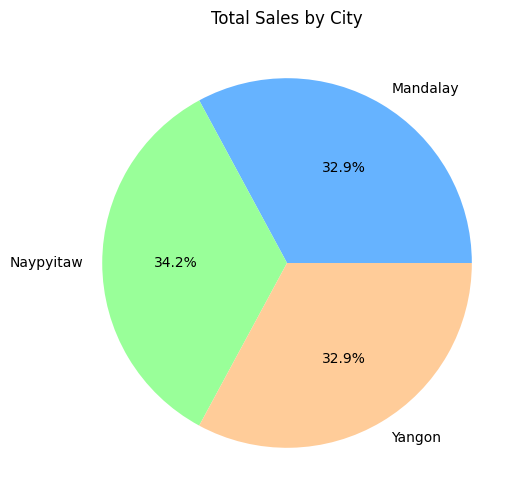

In [9]:
# 9. Group by City and sum Total sales
city_sales = df.groupby('City')['Total'].sum()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(city_sales, labels=city_sales.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Total Sales by City')
plt.show()


Customer type
Member    501
Normal    499
Name: count, dtype: int64


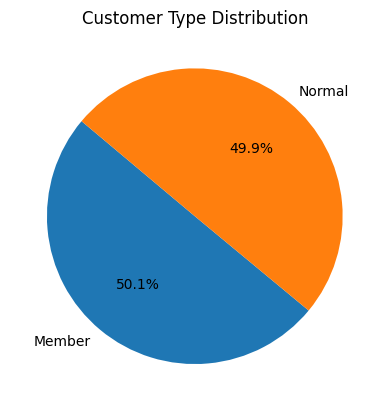

In [10]:
# 10. Customer Type Distribution
cust_type_counts = df['Customer type'].value_counts()
print(cust_type_counts)
cust_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Customer Type Distribution')
plt.ylabel('')
plt.show()


Gender distribution:
Gender
Female    501
Male      499
Name: count, dtype: int64


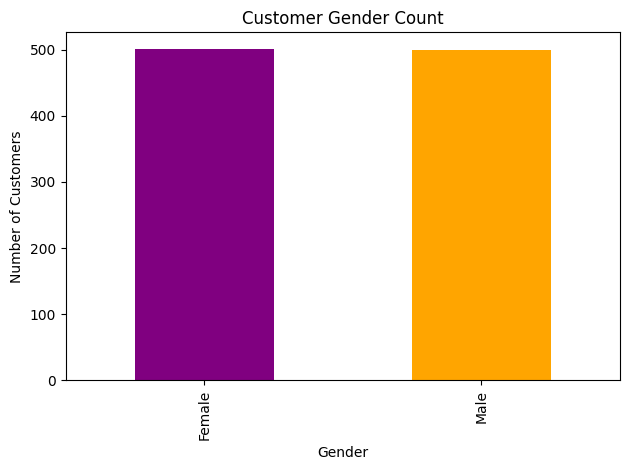

In [11]:
# 11. Gender distribution
gender_count = df["Gender"].value_counts()
print("\nGender distribution:")
print(gender_count)
# Bar plot of gender count
gender_count.plot(kind='bar', color=['purple', 'orange'], title="Customer Gender Count")
plt.xlabel("Gender")
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()



Sales count by Product Line:
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64


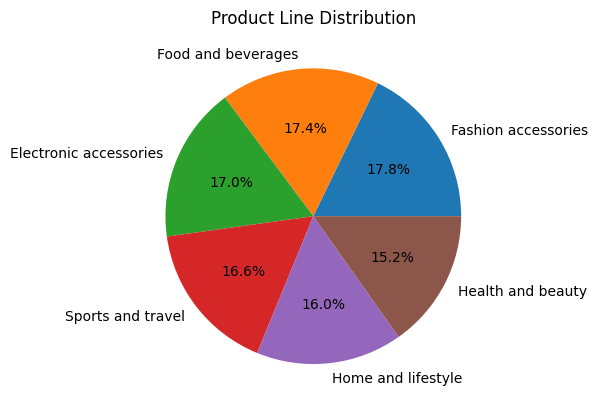

In [12]:
# 12. Product line popularity
product_sales = df["Product line"].value_counts()
print("\nSales count by Product Line:")
print(product_sales)
# Pie chart of product line sales
product_sales.plot(kind='pie', autopct='%1.1f%%', title='Product Line Distribution')
plt.ylabel("")
plt.show()

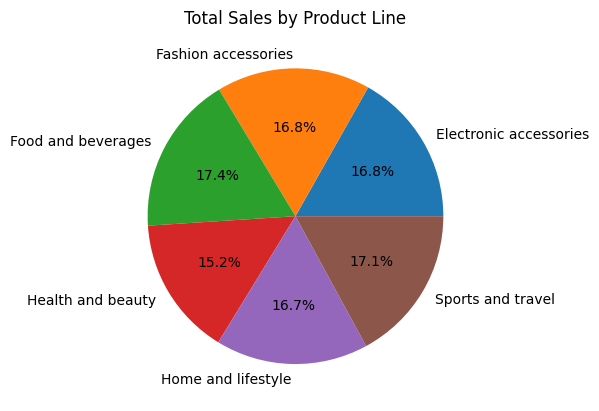

In [13]:
# 14. Group data by a specific category (e.g., Product line)
grouped_data = df.groupby('Product line')['Total'].sum()

# Extract labels and values
labels = grouped_data.index.to_list()
values = grouped_data.values.tolist()

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.title('Total Sales by Product Line')

plt.show()

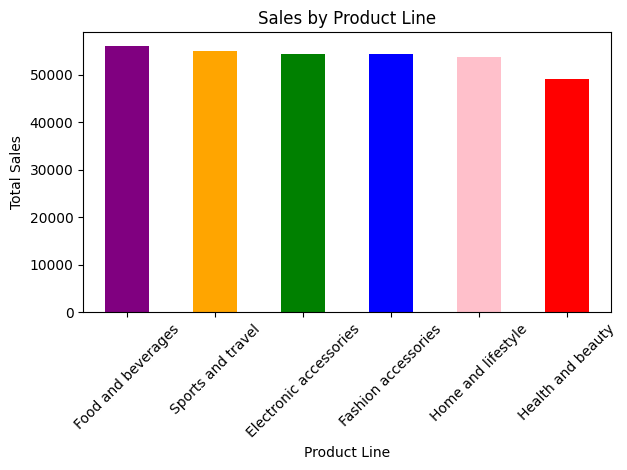

In [14]:
# 15. Product line performance
product_sales = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)
product_sales.plot(kind='bar', color=['purple', 'orange',"Green",'Blue','Pink','red'])
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Payment method usage:
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


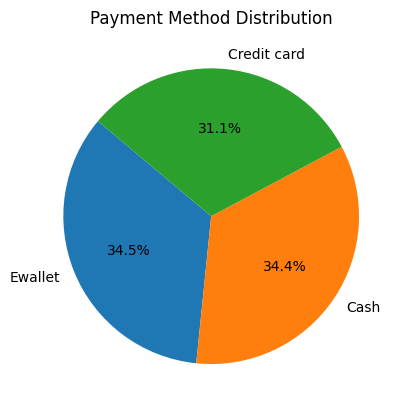

In [15]:
# 16. Payment method usage
payment_count = df["Payment"].value_counts()
print("\nPayment method usage:")
print(payment_count)
payment_counts = df['Payment'].value_counts()
payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

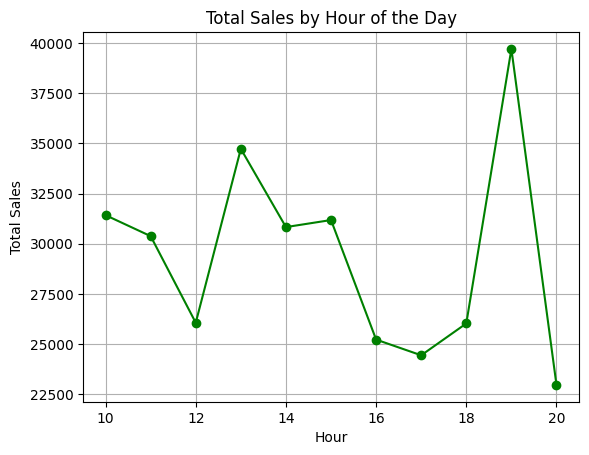

In [21]:
# 17. Sales by Hour (Time)
hourly_sales = df.groupby('Time')['Total'].sum()
hourly_sales.plot(kind='line', marker='o', color='green')
plt.title('Total Sales by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()



Gross Income by Branch:
Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross income, dtype: float64


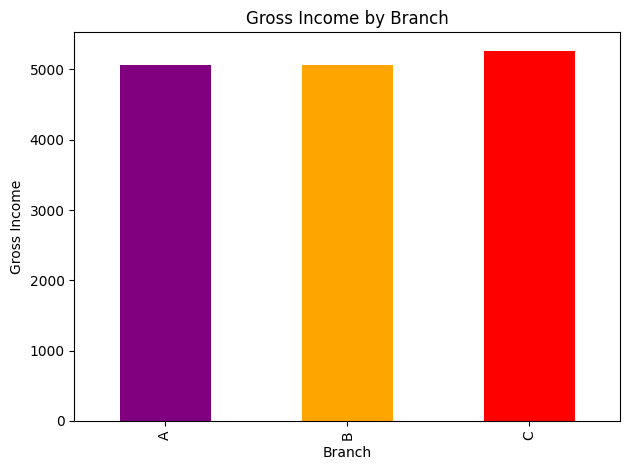

In [17]:
# 18. Gross income per branch
gross_income = df.groupby("Branch")["gross income"].sum()
print("\nGross Income by Branch:")
print(gross_income)

gross_income.plot(kind='bar', title='Gross Income by Branch', color=['purple', 'orange','Red'])
plt.ylabel("Gross Income")
plt.xlabel("Branch")
plt.tight_layout()
plt.show()

In [18]:
# 20. Gender by sales
gender_sales = df.groupby('Gender')['Total'].sum()
print("Sales by Gender:")
print(gender_sales)


Sales by Gender:
Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64



Average Rating by Branch:
Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64


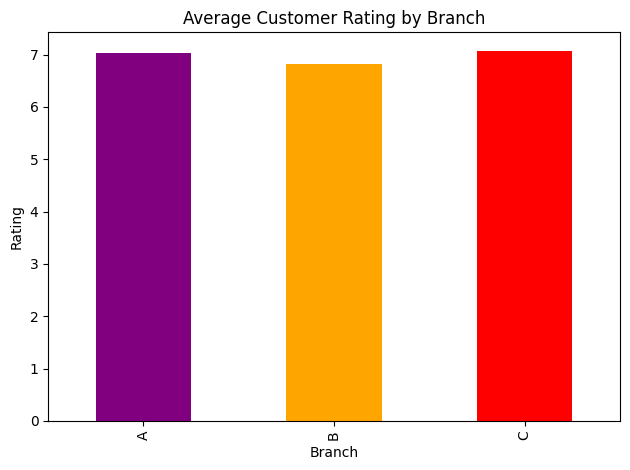

In [19]:
# 21. Average rating by branch
avg_rating = df.groupby("Branch")["Rating"].mean()
print("\nAverage Rating by Branch:")
print(avg_rating)
avg_rating.plot(kind='bar', title='Average Customer Rating by Branch', color=['purple', 'orange','Red'])
plt.ylabel("Rating")
plt.xlabel("Branch")
plt.tight_layout()
plt.show()